# 🚦 Dehradun Traffic Congestion Clusterer
Clustering and predicting congestion using DBSCAN and Linear Regression.

In [121]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
df = pd.read_csv("synthetic_dehradun_traffic.csv")


In [122]:
# 3. Encode Categorical Variables
df_encoded = df.copy()
df_encoded['Area'] = df_encoded['Area'].astype('category').cat.codes
df_encoded['Day'] = df_encoded['Day'].astype('category').cat.codes
df_encoded['Hour'] = df_encoded['Hour'].astype('category').cat.codes


In [123]:
# 4. Feature Selection & Scaling
features = df_encoded[['Hour', 'Day', 'Congestion_Level']].copy()

# OPTIONAL: Add reduced influence of location
features['Latitude'] = df_encoded['Latitude'] * 0.1
features['Longitude'] = df_encoded['Longitude'] * 0.1



In [140]:
# 5. DBSCAN Clustering
dbscan = DBSCAN(eps=1.35, min_samples=15)
df['Cluster'] = dbscan.fit_predict(features)

# View Cluster Distribution
print("Cluster Distribution:")
print(df['Cluster'].value_counts())


Cluster Distribution:
Cluster
-1     297
 0     225
 3     102
 5      64
 2      63
 6      58
 8      57
 9      45
 4      22
 11     19
 13     16
 14     15
 7       8
 12      5
 1       3
 10      1
Name: count, dtype: int64


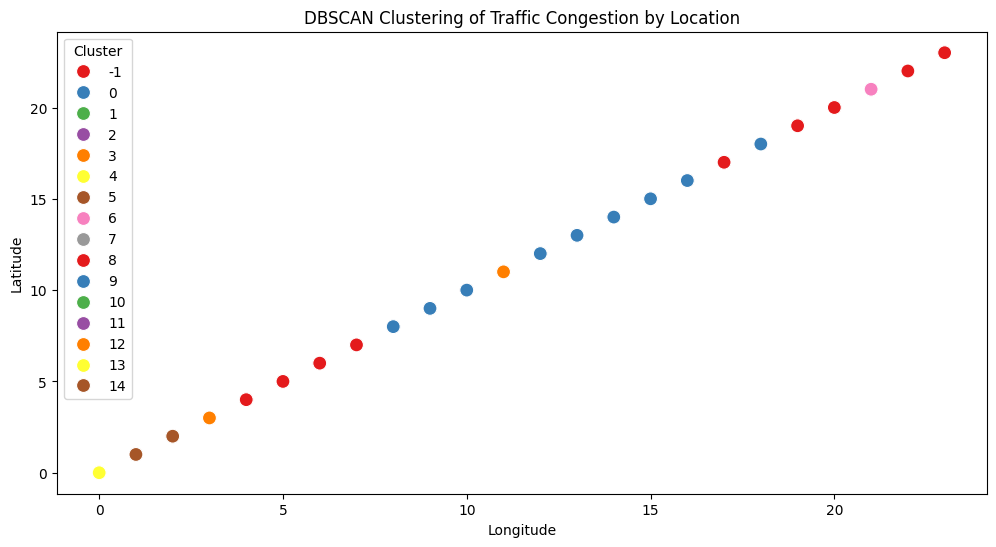

In [143]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hour', y='Hour', hue='Cluster', palette='Set1', s=100)
plt.title('DBSCAN Clustering of Traffic Congestion by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


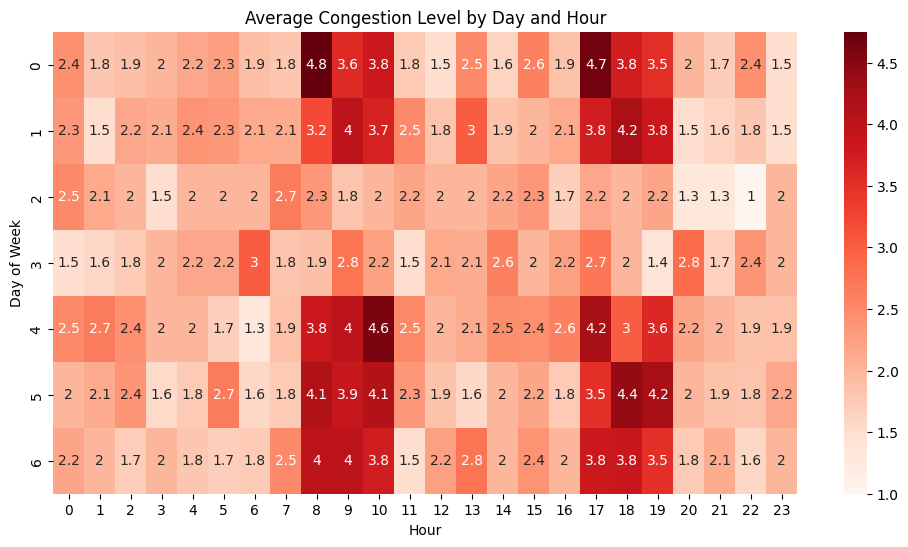

In [144]:
# 7. Heatmap: Avg Traffic Level vs Time Slot per Cluster
heatmap_data = df_encoded.groupby(['Day', 'Hour'])['Congestion_Level'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True)
plt.title("Average Congestion Level by Day and Hour")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.show()


In [145]:
# 8. Linear Regression for Prediction
X = df_encoded[['Area', 'Day', 'Hour']]
y = df_encoded['Congestion_Level']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
df['Predicted_Traffic'] = y_pred


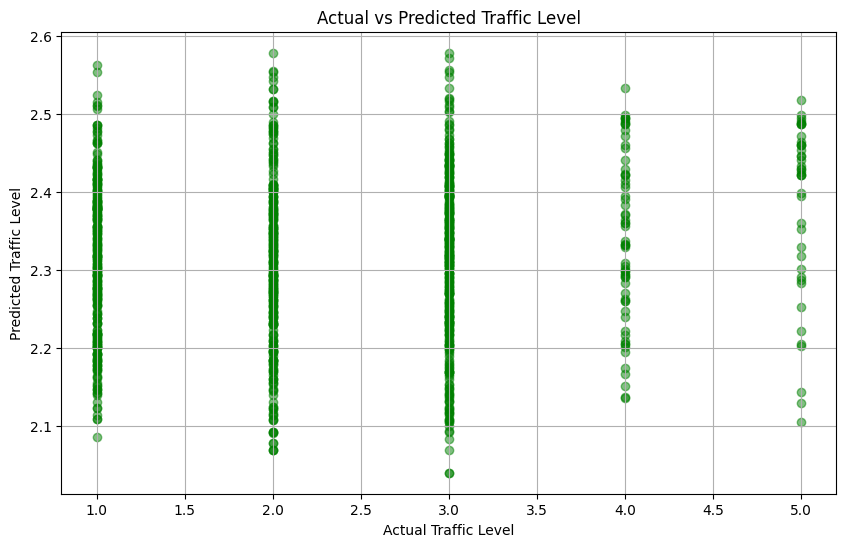

In [146]:
# 9. Visualize Actual vs Predicted Traffic
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, alpha=0.5, color='green')
plt.xlabel('Actual Traffic Level')
plt.ylabel('Predicted Traffic Level')
plt.title('Actual vs Predicted Traffic Level')
plt.grid(True)
plt.show()


In [ ]:
# 10. Save Final Output
df.to_csv("clustered_traffic_output.csv", index=False)
print("Clustered and predicted data saved to 'clustered_traffic_output.csv'")


Clustered and predicted data saved to 'clustered_traffic_output.csv'
